<b><p style='text-align: center;color:#f542b0;font-size:40px;'>Stroke Prediction</p></b>

<b><p style='text-align: center;color:#f542b0;font-size:30px;'>Group Jigglypuff</p></b>
    
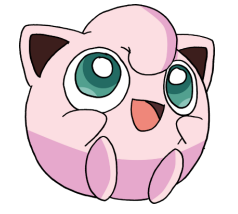

<b><p style='text-align: center;color:#000000;font-size:20px;'>Gamze Aksu – 171180005</p></b>

<b><p style='text-align: center;color:#000000;font-size:20px;'>Cansu Ayten – 171180010</p></b>

<b><p style='text-align: center;color:#000000;font-size:20px;'>Ceren Umay Özten – 181180060</p></b>


## Libraries 

In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.available
style.use("seaborn-deep")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import log_loss

## Preprocessing and Visualization

In [2]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.shape

(5110, 12)

In [5]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

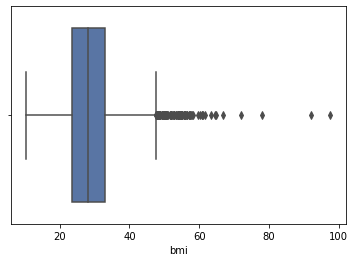

In [7]:
sns.boxplot(stroke.bmi)

In [8]:
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    rgb = [r, g, b]
    return rgb

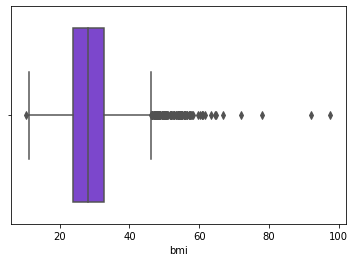

In [10]:
sns.boxplot(stroke.bmi, color = random_color()) #There is outliers in the data

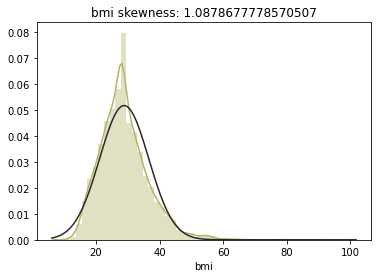

In [11]:
skewness = skew(stroke.bmi)
sns.distplot(stroke.bmi, fit = norm, color = random_color())
plt.title("bmi skewness: "+str(skewness))
plt.show()

In [12]:
outliers = stroke.bmi.quantile(0.997)
stroke.bmi = stroke.bmi[stroke.bmi<outliers]
stroke.isnull().sum() #median value is important

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  16
smoking_status        0
stroke                0
dtype: int64

In [13]:
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

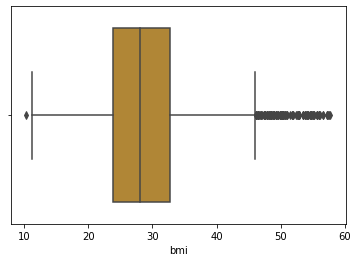

In [14]:
#repeat the process line until a few outliers are left
sns.boxplot(stroke.bmi, color = random_color())

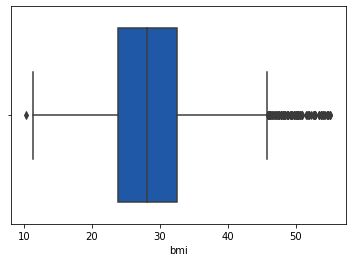

In [15]:
outliers = stroke.bmi.quantile(0.997)
stroke.bmi = stroke.bmi[stroke.bmi < outliers]
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
sns.boxplot(stroke.bmi, color = random_color())

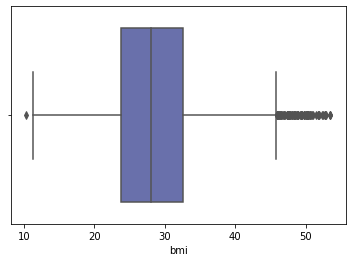

In [16]:
outliers = stroke.bmi.quantile(0.997)
stroke.bmi = stroke.bmi[stroke.bmi<outliers]
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
sns.boxplot(stroke.bmi, color = random_color())

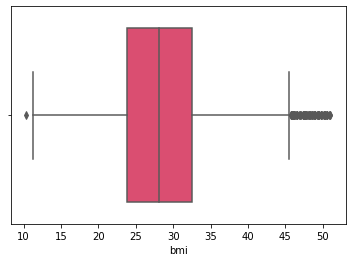

In [17]:
outliers = stroke.bmi.quantile(0.997)
stroke.bmi = stroke.bmi[stroke.bmi<outliers]
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
sns.boxplot(stroke.bmi, color = random_color())

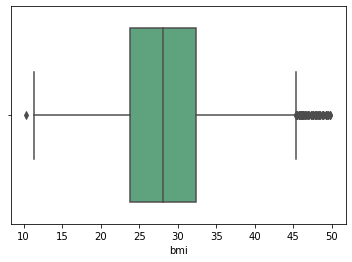

In [18]:
outliers = stroke.bmi.quantile(0.997)
stroke.bmi = stroke.bmi[stroke.bmi<outliers]
stroke.bmi = stroke.bmi.replace(np.nan, stroke.bmi.median())
sns.boxplot(stroke.bmi, color = random_color())

In [19]:
stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
stroke.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [21]:
stroke.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [22]:
stroke.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [23]:
stroke.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

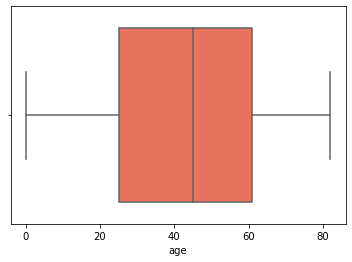

In [24]:
sns.boxplot(data = stroke, x = 'age', color = 'tomato')
plt.show()

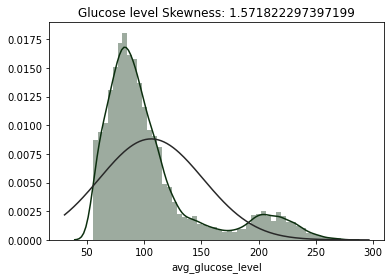

In [25]:
skewness = skew(stroke.avg_glucose_level)
sns.distplot(stroke.avg_glucose_level, fit = norm, color = random_color())
plt.title("Glucose level Skewness: " + str(skewness))
plt.show()

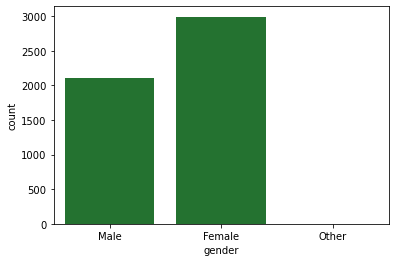

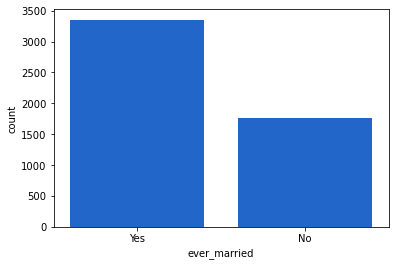

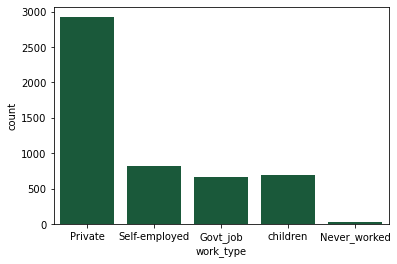

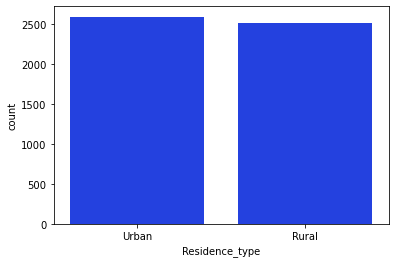

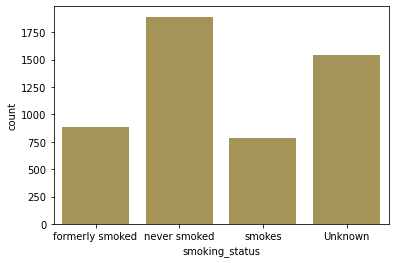

In [26]:
for x in stroke.select_dtypes(include = ['object']).columns:
    sns.countplot(stroke[x], color = random_color())
    plt.show()

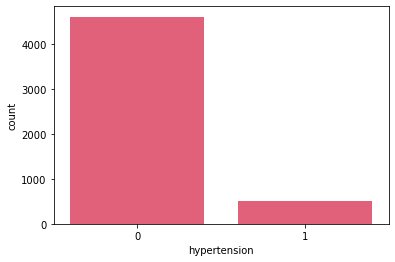

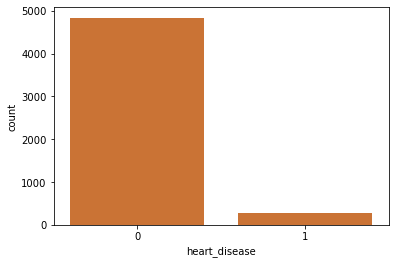

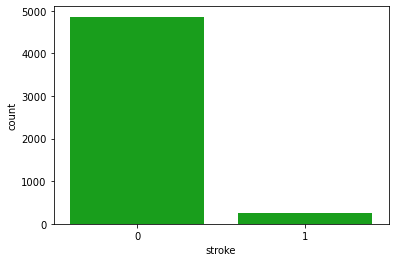

In [27]:
for x in ['hypertension', 'heart_disease', 'stroke']:
    sns.countplot(stroke[x], color = random_color())
    plt.show()


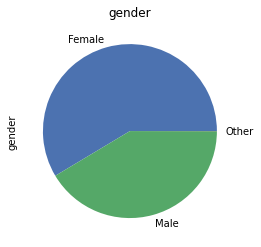

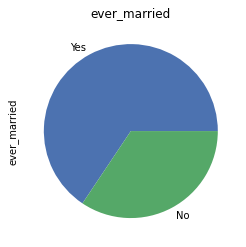

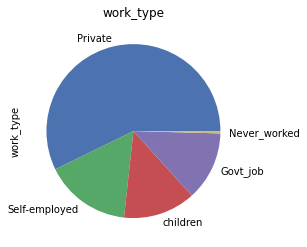

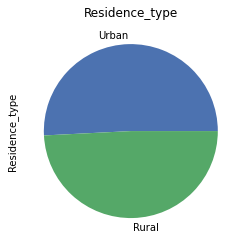

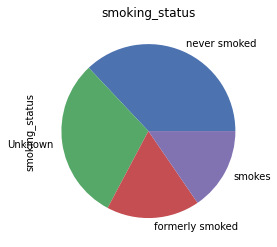

In [28]:
#this dataset is imbalanced respect to stroke result
stroke_positive_data = stroke[stroke['stroke']==1]
for x in stroke_positive_data.select_dtypes(include=['object']).columns:
    stroke[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

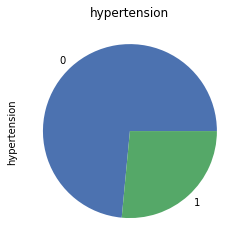

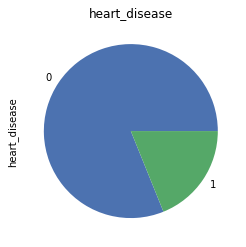

In [29]:
for x in ['hypertension', 'heart_disease']:
    stroke_positive_data[x].value_counts().plot.pie()
    plt.title(x)
    plt.show()

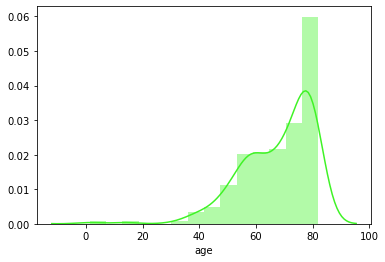

In [30]:
#we can make some observations about stroke data set
#people who dont smoke have higher risk of getting a stroke compared to smokers
#people who dont have hypertension or heart disease have higher risk of stroke compared to hypertensive and heart patients
#Therefore we can not take hypertension, smoking history and heart disease history to be definitive factors of stroke
#there is higher stroke proportion for female gender than male gender
#there is higher sroke proportion for married people than unmarried people
#there is higher stroke proportion for urban people than rural people
#there is higher stroke proportion for private sector workers than public sector workers

#age histogram
sns.distplot(stroke_positive_data['age'], color = random_color())
#especially older people with age of 80 have higher risk of stroke

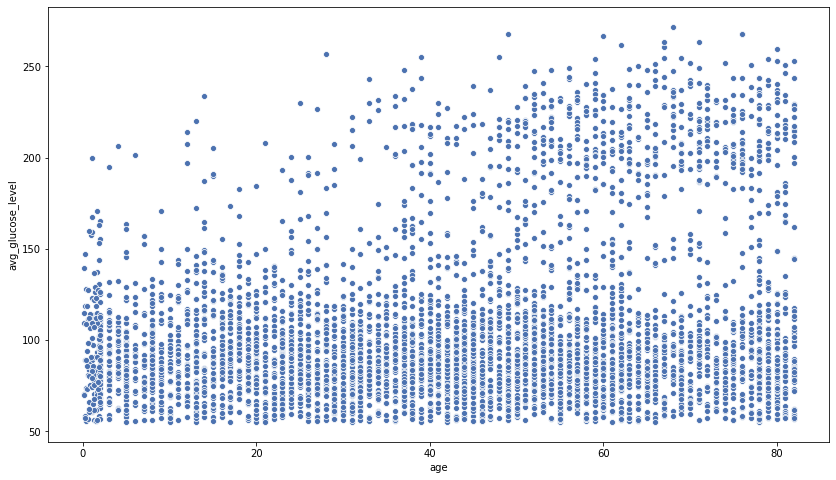

In [32]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = stroke, x = 'age', y = 'avg_glucose_level')

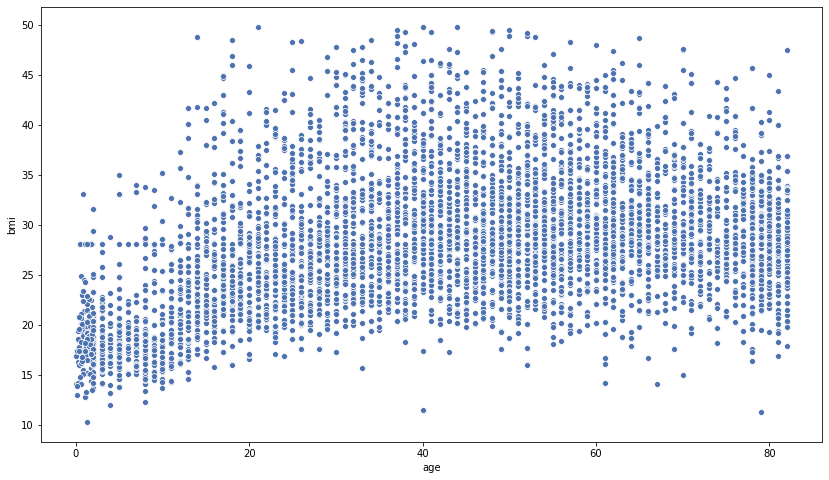

In [33]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = stroke, x = 'age', y = 'bmi')

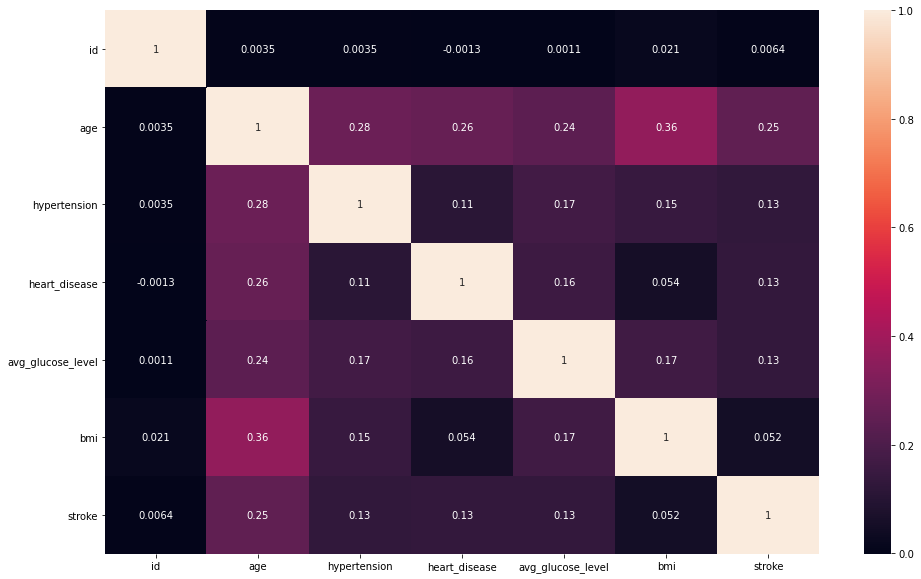

In [34]:
plt.figure(figsize = (16, 10))
sns.heatmap(stroke.corr(method = 'pearson'), annot = True)

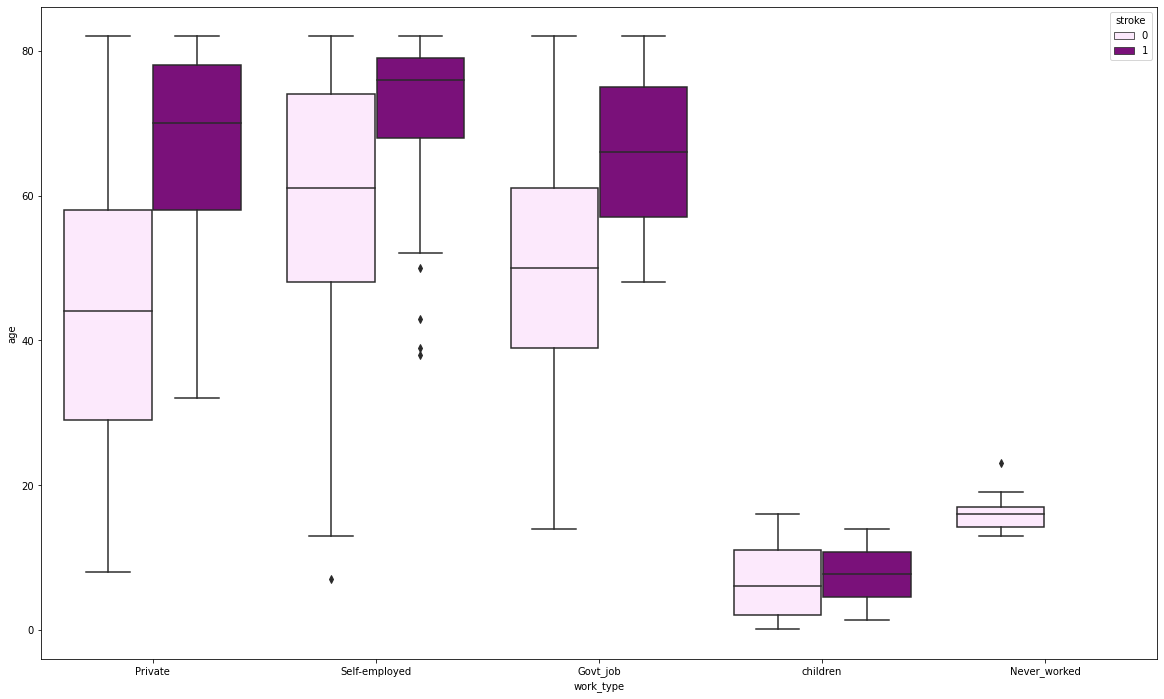

In [35]:
plt.figure(figsize = (20, 12))
sns.boxplot(data = stroke, y='age', x = 'work_type', hue = 'stroke', color = 'darkmagenta')
plt.show()
#there is no clear distinction between work type age and stroke probability

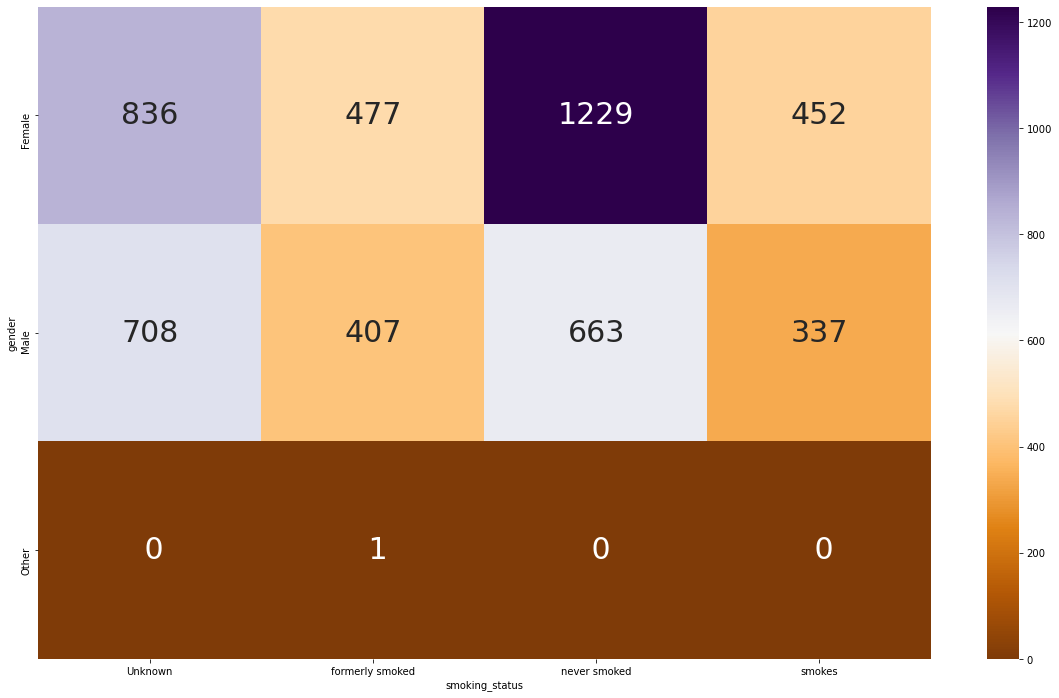

In [36]:
plt.figure(figsize = (20, 12))
sns.heatmap(pd.crosstab(stroke['gender'], stroke['smoking_status']), cmap = 'PuOr', annot = True, annot_kws = {"fontsize":30}, fmt = '2')
plt.show()

## Model Building with Keras

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
stroke= stroke.drop(['id'],axis=1)

In [40]:
stroke.drop(stroke[stroke["gender"] == "Other"].index,axis=0,inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder= LabelEncoder()
stroke['gender'] = label_encoder.fit_transform(stroke['gender'])
stroke['ever_married'] = label_encoder.fit_transform(stroke['ever_married'])
stroke['Residence_type'] = label_encoder.fit_transform(stroke['Residence_type'])
stroke['smoking_status'] = label_encoder.fit_transform(stroke['smoking_status'])
stroke['work_type'] = label_encoder.fit_transform(stroke['work_type'])


In [43]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [44]:
X = stroke.drop(["stroke"], axis=1)
y = stroke["stroke"].to_frame()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=13)
x_train, x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.1766 ,random_state=13)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3575, 10)
(767, 10)
(767, 10)
(3575, 1)
(767, 1)
(767, 1)


In [46]:
def model_build(input_shape,x_train,y_train,x_val,y_val, epoch = 50, verbose=1):
    model = Sequential()
    model.add(Dense(64,input_shape = input_shape,activation='relu')) 
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.00001)
    model.compile(loss= 'binary_crossentropy', metrics=['acc'], optimizer=opt)
    history= model.fit(x_train,y_train,
         epochs = epoch,
         shuffle=True,
         verbose=verbose,
         validation_data = (x_val,y_val)
         )
    return model, history

In [47]:
model, history = model_build((10,), x_train,y_train,x_val,y_val)


Epoch 1/50
112/112 [==============================] - 1s 4ms/step - loss: 18.0893 - acc: 0.0506 - val_loss: 16.3708 - val_acc: 0.0508
Epoch 2/50
112/112 [==============================] - 0s 2ms/step - loss: 14.7504 - acc: 0.0506 - val_loss: 12.9916 - val_acc: 0.0508
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 11.3395 - acc: 0.0506 - val_loss: 9.6334 - val_acc: 0.0508
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 7.8586 - acc: 0.0506 - val_loss: 6.1390 - val_acc: 0.0508
Epoch 5/50
112/112 [==============================] - 0s 1ms/step - loss: 4.6592 - acc: 0.1460 - val_loss: 3.5003 - val_acc: 0.3012
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 2.7697 - acc: 0.4316 - val_loss: 2.2387 - val_acc: 0.4694
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 1.8182 - acc: 0.5656 - val_loss: 1.4891 - val_acc: 0.5867
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - los

In [48]:
def model_history(model):
    y_pred = (model.predict(x_test) >= 0.5).astype("int")
    print("--------------------Accuracy Score----------------------")
    val_acc = accuracy_score(y_test,y_pred)
    print(val_acc)
    print("\n----------------Classification Report ------------------")
    print(classification_report(y_test,y_pred))
    loss, accuracy= model.evaluate(x_train,y_train,verbose=0)
    print("\n------------Training Loss Accuracy----------------------")
    print("Training Loss:",loss)
    print("Training Accuracy:",accuracy)
    cf = confusion_matrix(y_test,y_pred)
    print("\n-------------------Confusion Matrix---------------------")
    sns.heatmap(cf, annot=True,fmt="")
    plt.show()

traning_acc = list()
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, 'rs--',color = '#9b50ad', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'bs--',color = '#66debc', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

--------------------Accuracy Score----------------------
0.9621903520208605

----------------Classification Report ------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       738
           1       0.00      0.00      0.00        29

    accuracy                           0.96       767
   macro avg       0.48      0.50      0.49       767
weighted avg       0.93      0.96      0.94       767


------------Training Loss Accuracy----------------------
Training Loss: 0.19748762249946594
Training Accuracy: 0.9493706226348877

-------------------Confusion Matrix---------------------


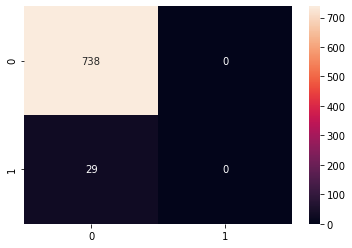

In [49]:
model_history(model)

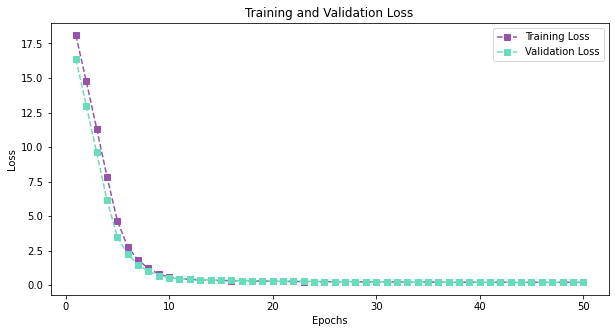

In [50]:
plot_history(history)

## Model Building from Scratch 

In [51]:
class NeuralNet():
    def __init__(self, layers=[10,32,32,1], learning_rate=0.01, iterations=500, init_weight = 'normal'):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        self.init_weight = init_weight

    def init_weights_zeros(self):
        self.params["W1"]=np.zeros((self.layers[0],self.layers[1])) 
        self.params["b1"]=np.zeros((self.layers[1],))
        self.params["W2"]=np.zeros((self.layers[1],self.layers[2]))
        self.params["b2"]=np.zeros((self.layers[2],))
        self.params["W3"]=np.zeros((self.layers[2],self.layers[3]))
        self.params["b3"]=np.zeros((self.layers[3],))

    def init_weights_normal(self):
        np.random.seed(1)
        self.params["W1"]=np.random.randn(self.layers[0],self.layers[1])
        self.params["b1"]=np.random.randn(self.layers[1],)
        self.params["W2"]=np.random.randn(self.layers[1],self.layers[2])
        self.params["b2"]=np.random.randn(self.layers[2],)
        self.params["W3"]=np.random.randn(self.layers[2],self.layers[3])
        self.params["b3"]=np.random.randn(self.layers[3],)
        
    def relu(self,Z):
        return np.maximum(0,Z)
                
    def derivative_of_relu(self,Z):
        ret = np.greater(Z, 0).astype(np.float64)
        return ret
    
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))     

    def cross_entropy_loss(self, y, yhat): 
        loss = log_loss(y, yhat)
        return loss


    def error(self, y, yhat):
        n = y.shape[0]
        result = np.abs(np.array(yhat) - np.array(y))
        err = result/float(n)
        return err
         
    def forward_propagation(self):
        
        Z=[0,0,0]
        A=[0,0,0]

        Z[0] = self.X.dot(self.params["W1"])+self.params["b1"] #z1
        A[0] = self.relu(Z[0]) #a1
        
        Z[1] = np.dot(A[0], self.params["W2"])+ self.params["b2"] #z2
        A[1] = self.relu(Z[1]) #a2

        Z[2] = np.dot(A[1], self.params["W3"])+ self.params["b3"] #z3
        A[2] = self.sigmoid(Z[2]) #a3

        self.params["Z1"] = Z[0]
        self.params["Z2"] = Z[1]
        self.params["Z3"] = Z[2]
        self.params["A1"] = A[0]
        self.params["A2"] = A[1]
        self.params["A3"] = A[2]
               
        yhat = A[2]
        loss = self.cross_entropy_loss(self.y,yhat) 
        return yhat,loss
        
    def back_propagation(self, yhat):                
        dl_a3 = self.error(self.y, yhat) #w2
        dl_z2 = np.dot(dl_a3,self.params["W3"].T) 
        dl_a2 = dl_z2 * self.derivative_of_relu(self.params["A2"]) #w1

        dl_z1 = np.dot(dl_a2,self.params["W2"].T) 
        dl_a1 = dl_z1 * self.derivative_of_relu(self.params["A1"])
         
        self.params["W1"] = self.params["W1"] - self.learning_rate * np.dot(self.X.T,dl_a1)
        self.params["b1"] = self.params["b1"] - self.learning_rate * np.sum(dl_a1,axis=0)
        self.params["W2"] = self.params["W2"] - self.learning_rate * np.dot(self.params["A1"].T,dl_a2)
        self.params["b2"] = self.params["b2"] - self.learning_rate * np.sum(dl_a2, axis=0) 
        self.params["W3"] = self.params["W3"] - self.learning_rate * np.dot(self.params["A2"].T,dl_a3)
        self.params["b3"] = self.params["b3"] - self.learning_rate * np.sum(dl_a3, axis=0)
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.init_weight == 'normal':
            self.init_weights_normal()
        elif self.init_weight == 'zeros':
            self.init_weights_zeros()
        else:
            print('Wrong initialization of weights!')
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation() 
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        self.X=X
        Z=[0,0,0]
        A=[0,0,0]
        
        Z[0]= X.dot(self.params["W1"])+self.params["b1"] #z1
        A[0] = self.relu(Z[0]) #a1
        
        Z[1] = A[0].dot(self.params["W2"])+ self.params["b2"] #z2
        A[1] = self.relu(Z[1])

        Z[2] = A[1].dot(self.params["W3"])+ self.params["b3"] #z2
        A[2] = self.sigmoid(Z[2])#a2
        
        pred = A[2] 
        pred1 = np.array(pred)
        pred1 = pred1.argmax(axis=1)
        return pred1
    
    def acc(self, y, yhat):
        a = sum(np.array(y) == yhat) 
        acc = int(a / len(y) * 100)
        return acc
 
    def plot_loss(self):
        plt.figure(figsize=(10,5))
        plt.plot(self.loss, '-',color = '#f542b0')
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [52]:
x_train_= np.array(x_train)
y_train_= np.array(y_train)
x_val_ = np.array(x_val)
y_val_ = np.array(y_val)

In [53]:
nn=NeuralNet(layers=[10,32,32,1], 
             learning_rate=0.1, 
             iterations=50, 
             init_weight = 'zeros')
nn.fit(x_train_,y_train_)
y_pred = nn.predict(x_val_)
nn.acc(y_val_.reshape(-1,),y_pred)

94

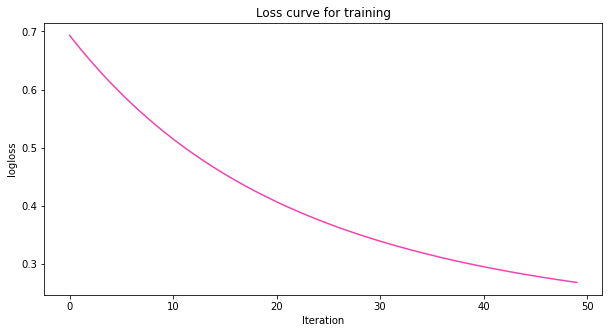

In [54]:
nn.plot_loss()

In [55]:
nn=NeuralNet(layers=[10,32,32,1], 
             learning_rate=0.001, 
             iterations=50, 
             init_weight = 'normal')
nn.fit(x_train_,y_train_)
y_pred = nn.predict(x_val_)
nn.acc(y_val_.reshape(-1,),y_pred)

94

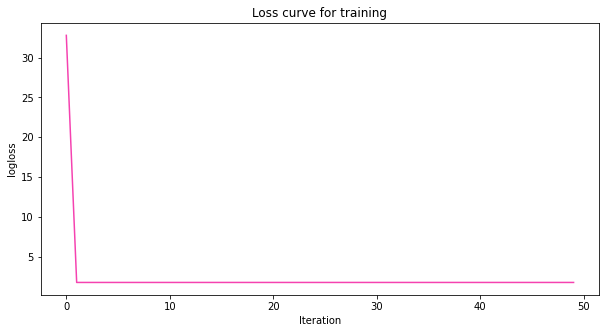

In [56]:
nn.plot_loss()

In [57]:
nn=NeuralNet(layers=[10,32,32,1], 
             learning_rate=0.01, 
             iterations=100, 
             init_weight = 'zeros')
nn.fit(x_train_,y_train_)
y_pred = nn.predict(x_val_)
nn.acc(y_val_.reshape(-1,),y_pred)

94

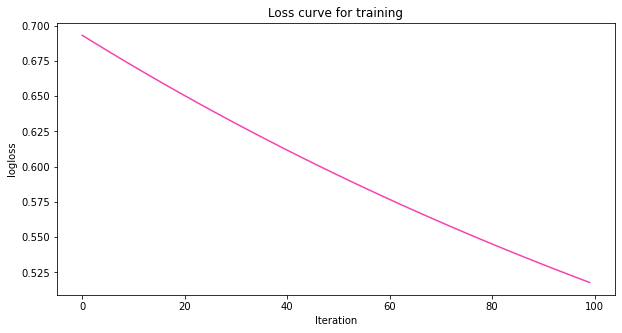

In [58]:
nn.plot_loss()

In [59]:
nn=NeuralNet(layers=[10,32,32,1], 
             learning_rate=0.0001, 
             iterations=50, 
             init_weight = 'normal')
nn.fit(x_train_,y_train_)
y_pred = nn.predict(x_val_)
nn.acc(y_val_.reshape(-1,),y_pred)

94

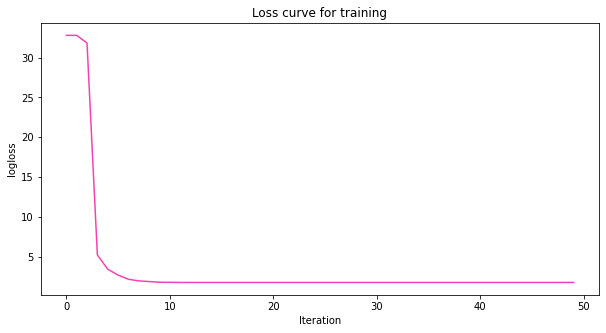

In [60]:
nn.plot_loss()

## Interpretability

### Summary

In [61]:
import shap

In [62]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1873,0,61.0,0,0,1,2,0,194.53,45.0,2
3781,0,69.0,0,1,0,2,1,193.45,34.5,2
2835,1,34.0,0,0,1,2,1,61.11,29.3,2
4967,0,60.0,0,0,1,2,0,99.00,26.1,2
9,0,78.0,0,0,1,2,1,58.57,24.2,0


In [63]:
def interpretability(model):
    explainer = shap.DeepExplainer(model=model,data=x_train_)
    shap_values = explainer.shap_values(X=x_train_)
    return explainer, shap_values

In [64]:
explainer, shap_values = interpretability(model)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


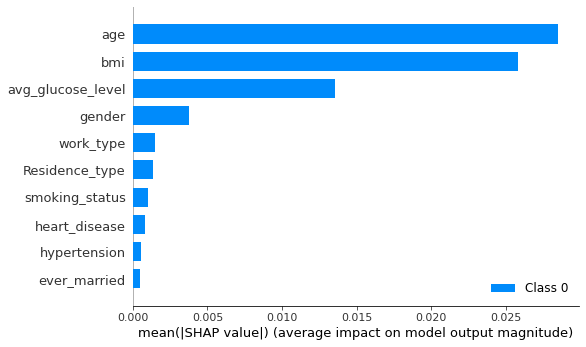

In [65]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

### Force Plot

In [66]:
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), 
                shap_values[0], 
                features = x_train.columns)

In [67]:
shap.force_plot(explainer.expected_value[0].numpy(),
                shap_values[0][0],
                features = x_train.columns)

### Decision Plot

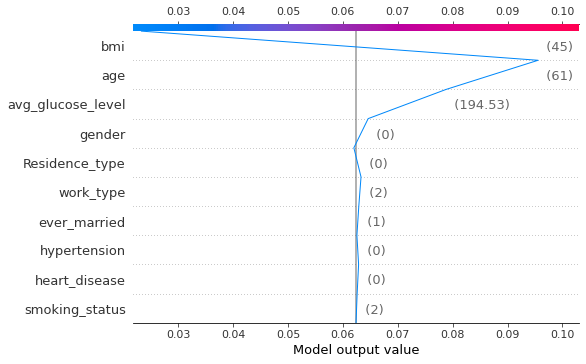

In [68]:
shap.decision_plot(explainer.expected_value[0].numpy(), 
                   shap_values[0][0], 
                   features = x_train.iloc[0,:],
                   feature_names = x_train.columns.tolist())

### Waterfall

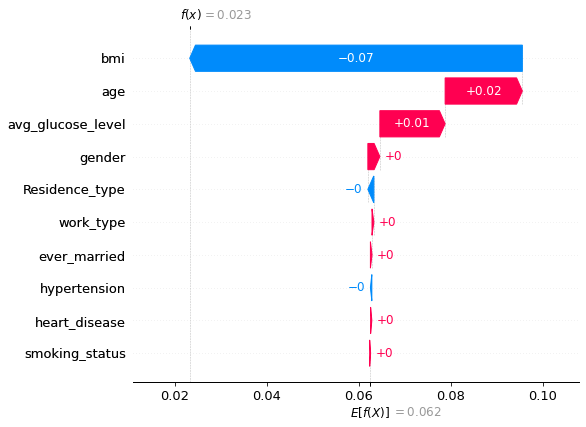

In [69]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), 
                                       shap_values[0][0], 
                                       feature_names = x_train.columns)

## When the age feature is removed

In [70]:
x_train_age = x_train.drop(['age'],axis=1)

In [71]:
x_val_age = x_val.drop(['age'],axis=1)

In [72]:
x_train_= np.array(x_train_age)
x_val_ = np.array(x_val_age)

In [73]:
model, _ = model_build((9,),x_train_age,y_train,x_val_age,y_val,50,0)

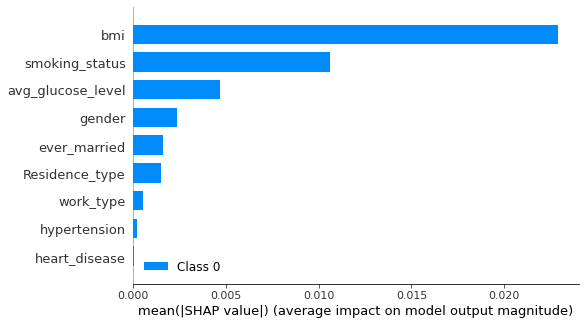

In [74]:
explainer, shap_values = interpretability(model)
shap.summary_plot(shap_values, x_train_age, plot_type="bar")

In [75]:
shap.force_plot(explainer.expected_value[0].numpy(), 
                shap_values[0][0], 
                features = x_train_age.columns)

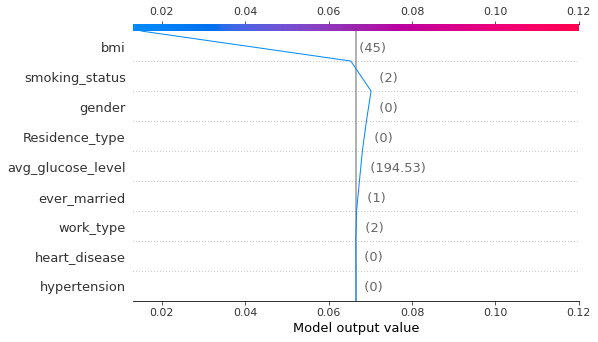

In [76]:
shap.decision_plot(explainer.expected_value[0].numpy(), 
                   shap_values[0][0], 
                   features = x_train_age.iloc[0,:], 
                   feature_names = x_train_age.columns.tolist())

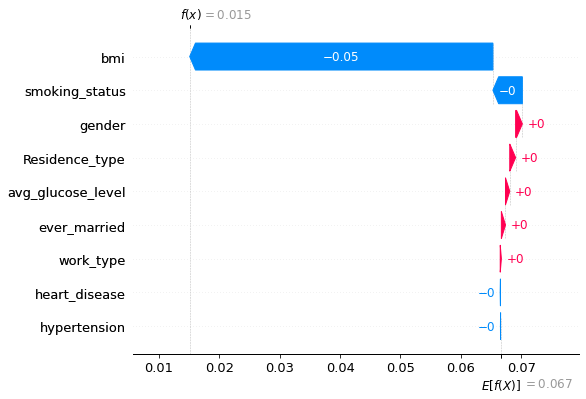

In [77]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), 
                                       shap_values[0][0], 
                                       feature_names = x_train_age.columns)

## When the heart disease feature is removed

In [78]:
x_train_h = x_train.drop(['heart_disease'],axis=1)
x_val_h = x_val.drop(['heart_disease'],axis=1)
x_train_= np.array(x_train_h)
x_val_ = np.array(x_val_h)

In [79]:
model,_ = model_build((9,),x_train_h,y_train,x_val_h,y_val,50,0)

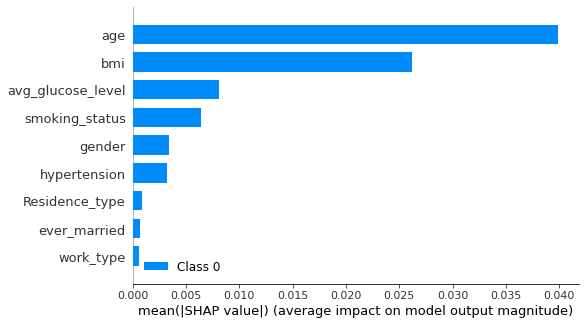

In [80]:
explainer, shap_values = interpretability(model)
shap.summary_plot(shap_values, x_train_h, plot_type="bar")

In [81]:
shap.force_plot(explainer.expected_value[0].numpy(), 
                shap_values[0][0], 
                features = x_train_h.columns)

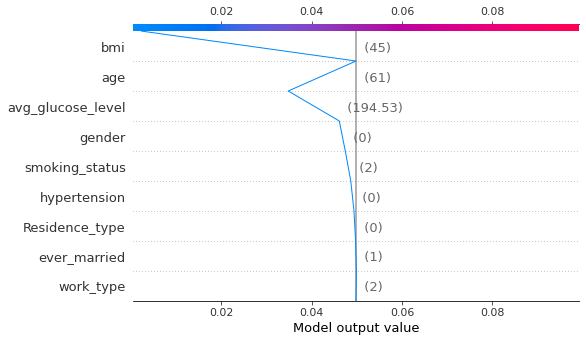

In [82]:
shap.decision_plot(explainer.expected_value[0].numpy(), 
                   shap_values[0][0], 
                   features = x_train_h.iloc[0,:], 
                   feature_names = x_train_h.columns.tolist())

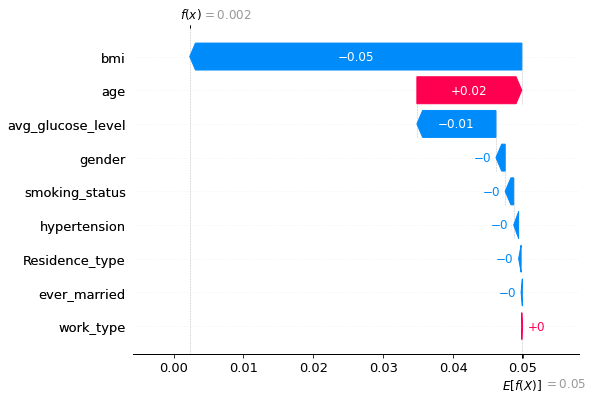

In [83]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), 
                                       shap_values[0][0], 
                                       feature_names = x_train_h.columns)